<a href="https://colab.research.google.com/github/maurinhopa/mvp-puc-heart-failure/blob/main/MVP_Heart_Failure_Mauro_ACN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - PUC RIO - 06.07.2025

Sprint: Análise de Dados e Boas Práticas

Mauro Athayde Campos Nascimento

# Predição de Mortalidade em Pacientes com Insuficiência Cardíaca

# 1. Introdução

Este trabalho tem como objetivo aplicar os conceitos de análise exploratória e pré-processamento de dados, com base em um dataset real de 299 pacientes com insuficiência cardíaca, coletado durante o ano de 2015 em hospitais do Paquistão.

A base foi escolhida por conter um tema relevante e crítico: a previsão de mortalidade hospitalar. Compacta e de fácil manuseio e com variáveis clínicas objetivas, o estudo está baseado em um artigo científico publicado em 2020 (*Chicco & Jurman*), que demonstra que é possível prever a mortalidade de pacientes com base em apenas duas variáveis clínicas: **fração de ejeção** e **creatinina sérica**.

Vamos explorar essa base com olhar analítico, passando pelas etapas de entendimento do problema, análise estatística, visualização e preparação dos dados, conforme proposto no escopo da disciplina.



# 2. Definição do problema

**2.1 Problema:**  
Queremos prever se um paciente com insuficiência cardíaca irá sobreviver ou falecer durante o período de acompanhamento hospitalar, com base em informações clínicas e laboratoriais.

**2.2 Tipo de problema:**  
Do tipo Aprendizado Supervisionado (classificação binária), com variável-alvo sendo `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu).

**2.3 Premissas iniciais:**  
- A mortalidade está fortemente associada a marcadores como **fração de ejeção** e **creatinina sérica**, conforme validado no artigo original.  
- Outras variáveis clínicas (como idade, plaquetas, hipertensão, etc.) podem ter influência complementar, mas espera-se que **as duas variáveis principais concentrem a maior parte do poder preditivo**.

**2.4 Condições para uso da base:**  
- A base foi selecionada por estar disponível publicamente (UCI Machine Learning Repository) e por ter sido utilizada em estudo científico recente e bem estruturado (Chicco & Jurman, 2020).
- Possui apenas **299 registros e 13 atributos**, o que favorece a manipulação didática, sem comprometer a profundidade da análise.
- Os dados foram coletados entre abril e dezembro de 2015, em dois hospitais do Paquistão, e representam pacientes com insuficiência cardíaca em estágio avançado.

**2.5 Variável-alvo (target):**  
- `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu)

A seguir, apresentamos o dicionário de variáveis da base.


# 3. Dicionário das variáveis (com significados)

A base de dados possui 13 variáveis (atributos), listadas abaixo com seus significados, tipos e unidades:

| Nome da variável | Tipo | Significado |
|------------------|------|-------------|
| `age` | Numérica | Idade do paciente (em anos) |
| `anaemia` | Binária | 0 = sem anemia, 1 = com anemia |
| `creatinine_phosphokinase` | Numérica | Nível da enzima CPK (mcg/L) |
| `diabetes` | Binária | 0 = não diabético, 1 = diabético |
| `ejection_fraction` | Numérica | Fração de ejeção do coração (%) |
| `high_blood_pressure` | Binária | 0 = sem hipertensão, 1 = com hipertensão |
| `platelets` | Numérica | Contagem de plaquetas (milhares/mL) |
| `serum_creatinine` | Numérica | Creatinina sérica (mg/dL) |
| `serum_sodium` | Numérica | Sódio sérico (mEq/L) |
| `sex` | Binária | 0 = mulher, 1 = homem |
| `smoking` | Binária | 0 = não fumante, 1 = fumante |
| `time` | Numérica | Tempo de acompanhamento (em dias) |
| `DEATH_EVENT` | Binária | 0 = sobreviveu, 1 = faleceu |


# 4. Carregamento da base de dados

Nesta etapa, realizamos o carregamento da base de dados diretamente de um repositório público hospedado no GitHub, utilizando o `pandas`. O separador utilizado foi o ponto e vírgula (`;`), pois o arquivo CSV original segue este padrão.

Também configuramos a exibição dos dados para mostrar apenas duas casas decimais nos números de ponto flutuante. Essa padronização facilita a leitura dos outputs ao longo da análise exploratória.


In [22]:
# Carrega a base original
import pandas as pd

url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url, sep=';')

# Configura a exibição para 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

# 5. Estatísticas descritivas iniciais

Nesta etapa buscamos entender a estrutura da base e possíveis problemas de integridade. Abaixo, seguem considerações importantes descobertas através de análise sobre a base de dados em questão, conforme análises abaixo:

In [23]:
import pandas as pd

# 1. Número de instâncias e atributos
print("\033[1m# 1. Número de instâncias e atributos\033[0m")
print(f'Número de instâncias: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}')

# 2. Tipos de dados
print("\n\033[1m# 2. Tipos de dados\033[0m")
print("\nTipos de dados por coluna:")
print(df.dtypes)

# 3. Primeiras linhas
print("\n\033[1m# 3. Primeiras linhas\033[0m")
print("\nPrimeiras 5 linhas:")
display(df.head())

# 4. Verificação de valores ausentes
print("\n\033[1m# 4. Verificação de valores ausentes\033[0m")
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# 5. Resumo estatístico básico
print("\n\033[1m# 5.1 Resumo estatístico básico\033[0m")
print("\nResumo estatístico:")
display(df.describe())

# 6. Mediana dos atributos numéricos
print("\n\033[1m# 5.2 Mediana dos atributos numéricos\033[0m")
print("\nMediana dos atributos:")
mediana = df.median(numeric_only=True).to_frame(name='Mediana')
display(mediana)

# 7. Moda dos atributos
print("\n\033[1m# 5.3 Moda dos atributos\033[0m")
print("\nModa dos atributos:")
moda = df.mode().iloc[[0]].T.rename(columns={0: 'Moda'})
display(moda)



# 1. Número de instâncias e atributos
Número de instâncias: 299
Número de atributos: 13

# 2. Tipos de dados

Tipos de dados por coluna:
age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# 3. Primeiras linhas

Primeiras 5 linhas:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.70,116,0,0,8,1



# 4. Verificação de valores ausentes

Valores ausentes por coluna:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 5.1 Resumo estatístico básico

Resumo estatístico:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,466.23,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,4948.43,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,60667.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00



# 5.2 Mediana dos atributos numéricos

Mediana dos atributos:


,Mediana
age,60.00
anaemia,0.00
creatinine_phosphokinase,250.00
diabetes,0.00
ejection_fraction,38.00
high_blood_pressure,0.00
platelets,262000.00
serum_creatinine,1.10
serum_sodium,137.00
sex,1.00



# 5.3 Moda dos atributos

Moda dos atributos:


,Moda
age,60.00
anaemia,0.00
creatinine_phosphokinase,582.00
diabetes,0.00
ejection_fraction,35.00
high_blood_pressure,0.00
platelets,263358.03
serum_creatinine,1.00
serum_sodium,136.00
sex,1.00


Através das análise realizadas acima, responderemos a alguns questionamentos fundamentais:

**5.1 Quantos atributos e instâncias existem?**  
A base possui 13 atributos (colunas) e 299 instâncias (linhas), representando pacientes com insuficiência cardíaca.

**5.2 Quais são os tipos de dados dos atributos?**  
Todos os atributos do dataset são numéricos, sendo representados como `int64` (inteiros) ou `float64` (decimais). A base não contém variáveis categóricas explícitas ou atributos de texto. Algumas variáveis são binárias (0 ou 1), indicando presença ou ausência de condição clínica.

**5.3 Verifique as primeiras linhas do dataset. Algo chama a atenção?**  
As primeiras linhas mostram dados organizados, ainda que posteriormente tenha sido identificada uma anomalia na variável `age`, com valores de 60667 anos, o que claramente indica erro.

**5.4 Há valores faltantes, discrepantes ou inconsistentes?**  
Não há valores faltantes, mas encontramos **dois valores discrepantes em `age`**, advindos da base original disponível. Esses casos foram tratados a parte, e documentados na sequência.

**5.5 Resumo estatístico dos atributos numéricos — o que você percebe?**  
Antes da correção, a média da idade estava absurdamente alta (~466 anos) por causa dos valores corrompidos. Após substituição por valores válidos, os dados passaram a refletir a realidade, conforme novo resumo estatístico impresso.

Também foi observado grande amplitude em variáveis como `creatinine_phosphokinase` e `platelets`, o que pode indicar necessidade de  transformações, tema que será abordado mais a fundo na etapa de pré-processamento. O resumo estatístico se prova especialmente importante neste momento de análise prévio dos dados, ajudando a identificar anomalias com o intuito de garantir a integridade da base.

### Detalhamento: Detecção de valor atípico - Variável **AGE**
Ao inspecionar os dados estatísticos, foi identificado um valor máximo anormal na variável age, com o registro de 60.667 anos, o que é incompatível com a natureza da variável, originado de possível erro de digitação ou exportação do arquivo.

Como o restante das colunas dessa linha aparenta estar consistente, optamos por corrigir o valor, e não remover o registro por completo, para preservar os dados originais e evitar perda de informação em uma base onde cada instância é relevante.



### Tratamento de inconsistências - Variável **AGE**

Para o tratamento desta inconsistência, optamos por uma abordagem mais refinada: em vez de excluir os registros ou imputar com a média geral, **substituímos os valores com base na mediana de idade de pacientes com perfil clínico semelhante** (considerando sexo, tabagismo, diabetes e desfecho). Essa técnica, apesar de simples, respeita o contexto dos dados e evita distorções estatísticas.

Ao de aplicar a substituição inteligente, registramos abaixo os valores antes e depois da correção:

| Índice | Valor original (`age`) | Valor corrigido (mediana do grupo) |
|--------|-------------------------|-------------------------------------|
| 185     | 60667                  | 65                                  |
| 188     | 60667                  | 60                                  |

A correção acima descrita foi feita individualmente para cada linha afetada, conforme códigos a seguir:


In [24]:
# Verifica os registros usados como base para a interpolação de cada índice com erro
for idx in [186, 213]:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    grupo = df.loc[filtro]

    print(f"\nBase usada para interpolar índice {idx}: {len(grupo)} instâncias")
    display(grupo[['age', 'sex', 'diabetes', 'smoking', 'DEATH_EVENT']])

    # Substituições manuais (método já validado com base na mediana do grupo)
df.loc[185, 'age'] = 65
df.loc[188, 'age'] = 60




Base usada para interpolar índice 186: 13 instâncias


,age,sex,diabetes,smoking,DEATH_EVENT
8,65,0,0,0,1
18,70,0,0,0,1
26,95,0,0,0,1
49,57,0,0,0,1
51,53,0,0,0,1
61,50,0,0,0,1
68,70,0,0,0,1
113,70,0,0,0,1
119,86,0,0,0,1
150,72,0,0,0,1



Base usada para interpolar índice 213: 18 instâncias


,age,sex,diabetes,smoking,DEATH_EVENT
4,65,0,1,0,1
19,48,0,1,0,1
21,65,0,1,0,1
24,75,0,1,0,1
32,50,0,1,0,1
37,82,0,1,0,1
39,60,0,1,0,1
44,60,0,1,0,1
52,60,0,1,0,1
53,70,0,1,0,1


In [25]:
# Índices com erro conhecido
indices_com_erro = [185, 188]

# Lista para armazenar os resultados
resultados = []

# Loop para exibir as substituições
for idx in indices_com_erro:
    perfil = df.loc[idx]

    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    resultados.append({
        'Índice': idx,
        'Valor original': 60667,
        'Valor corrigido': int(idade_corrigida)
    })

# Mostrar resultados
import pandas as pd
display(pd.DataFrame(resultados))


,Índice,Valor original,Valor corrigido
0,185,60667,65
1,188,60667,58


In [26]:
mensagens = []

# Define os índices com erro
indices_com_erro = [185, 188]

for idx in indices_com_erro:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    mensagens.append(f"→ Índice {idx} | Valor original: 60667 | Valor corrigido: {int(idade_corrigida)}")

    df.at[idx, 'age'] = idade_corrigida


# Exibe o novo resumo estatístico da variável corrigida
print("\nResumo da variável 'age' após correções:")
display(df['age'].describe())



Resumo da variável 'age' após correções:


,age
count,299.00
mean,60.84
std,11.90
min,40.00
25%,51.00
50%,60.00
75%,70.00
max,95.00


### Finalização - Estatística Descritiva

Por fim, o resumo estatístico final acima, mostra que a variável AGE voltou a apresentar valores compatíveis com a realidade clínica, com distribuição coerente e sem valores extremos artificiais.
Essa etapa encerra a fase de inspeção e tratamento de dados, garantindo uma base mais limpa e confiável para as análises posteriores.

# 6. Análise Visual dos Dados

Nesta etapa, exploramos visualmente os dados para identificar padrões, tendências e possíveis relações entre as variáveis e o desfecho de interesse (DEATH_EVENT). As visualizações foram divididas em quatro partes: atributos numéricos (histograma), relações entre variáveis (boxplot), variáveis binárias (gráficos de barra) e análise de correlação (heatmap).

## 6.1 Distribuição dos Atributos Numéricos - Histograma com KDE

Objetivo: Observar a distribuição de cada variável numérica para identificar padrões, assimetrias, valores extremos ou possíveis necessidades de transformação (ex: normalização, discretização ou padronização), que podem ser úteis na etapa de modelagem.

A análise gráfica das distribuições permite visualizar rapidamente o comportamento dos dados. Usamos histogramas com curva de densidade (KDE) para facilitar a interpretação da forma da distribuição: simétrica, assimétrica, com cauda longa, concentrada, dispersa etc.

Abaixo, apresentamos a distribuição dos atributos numéricos da base:

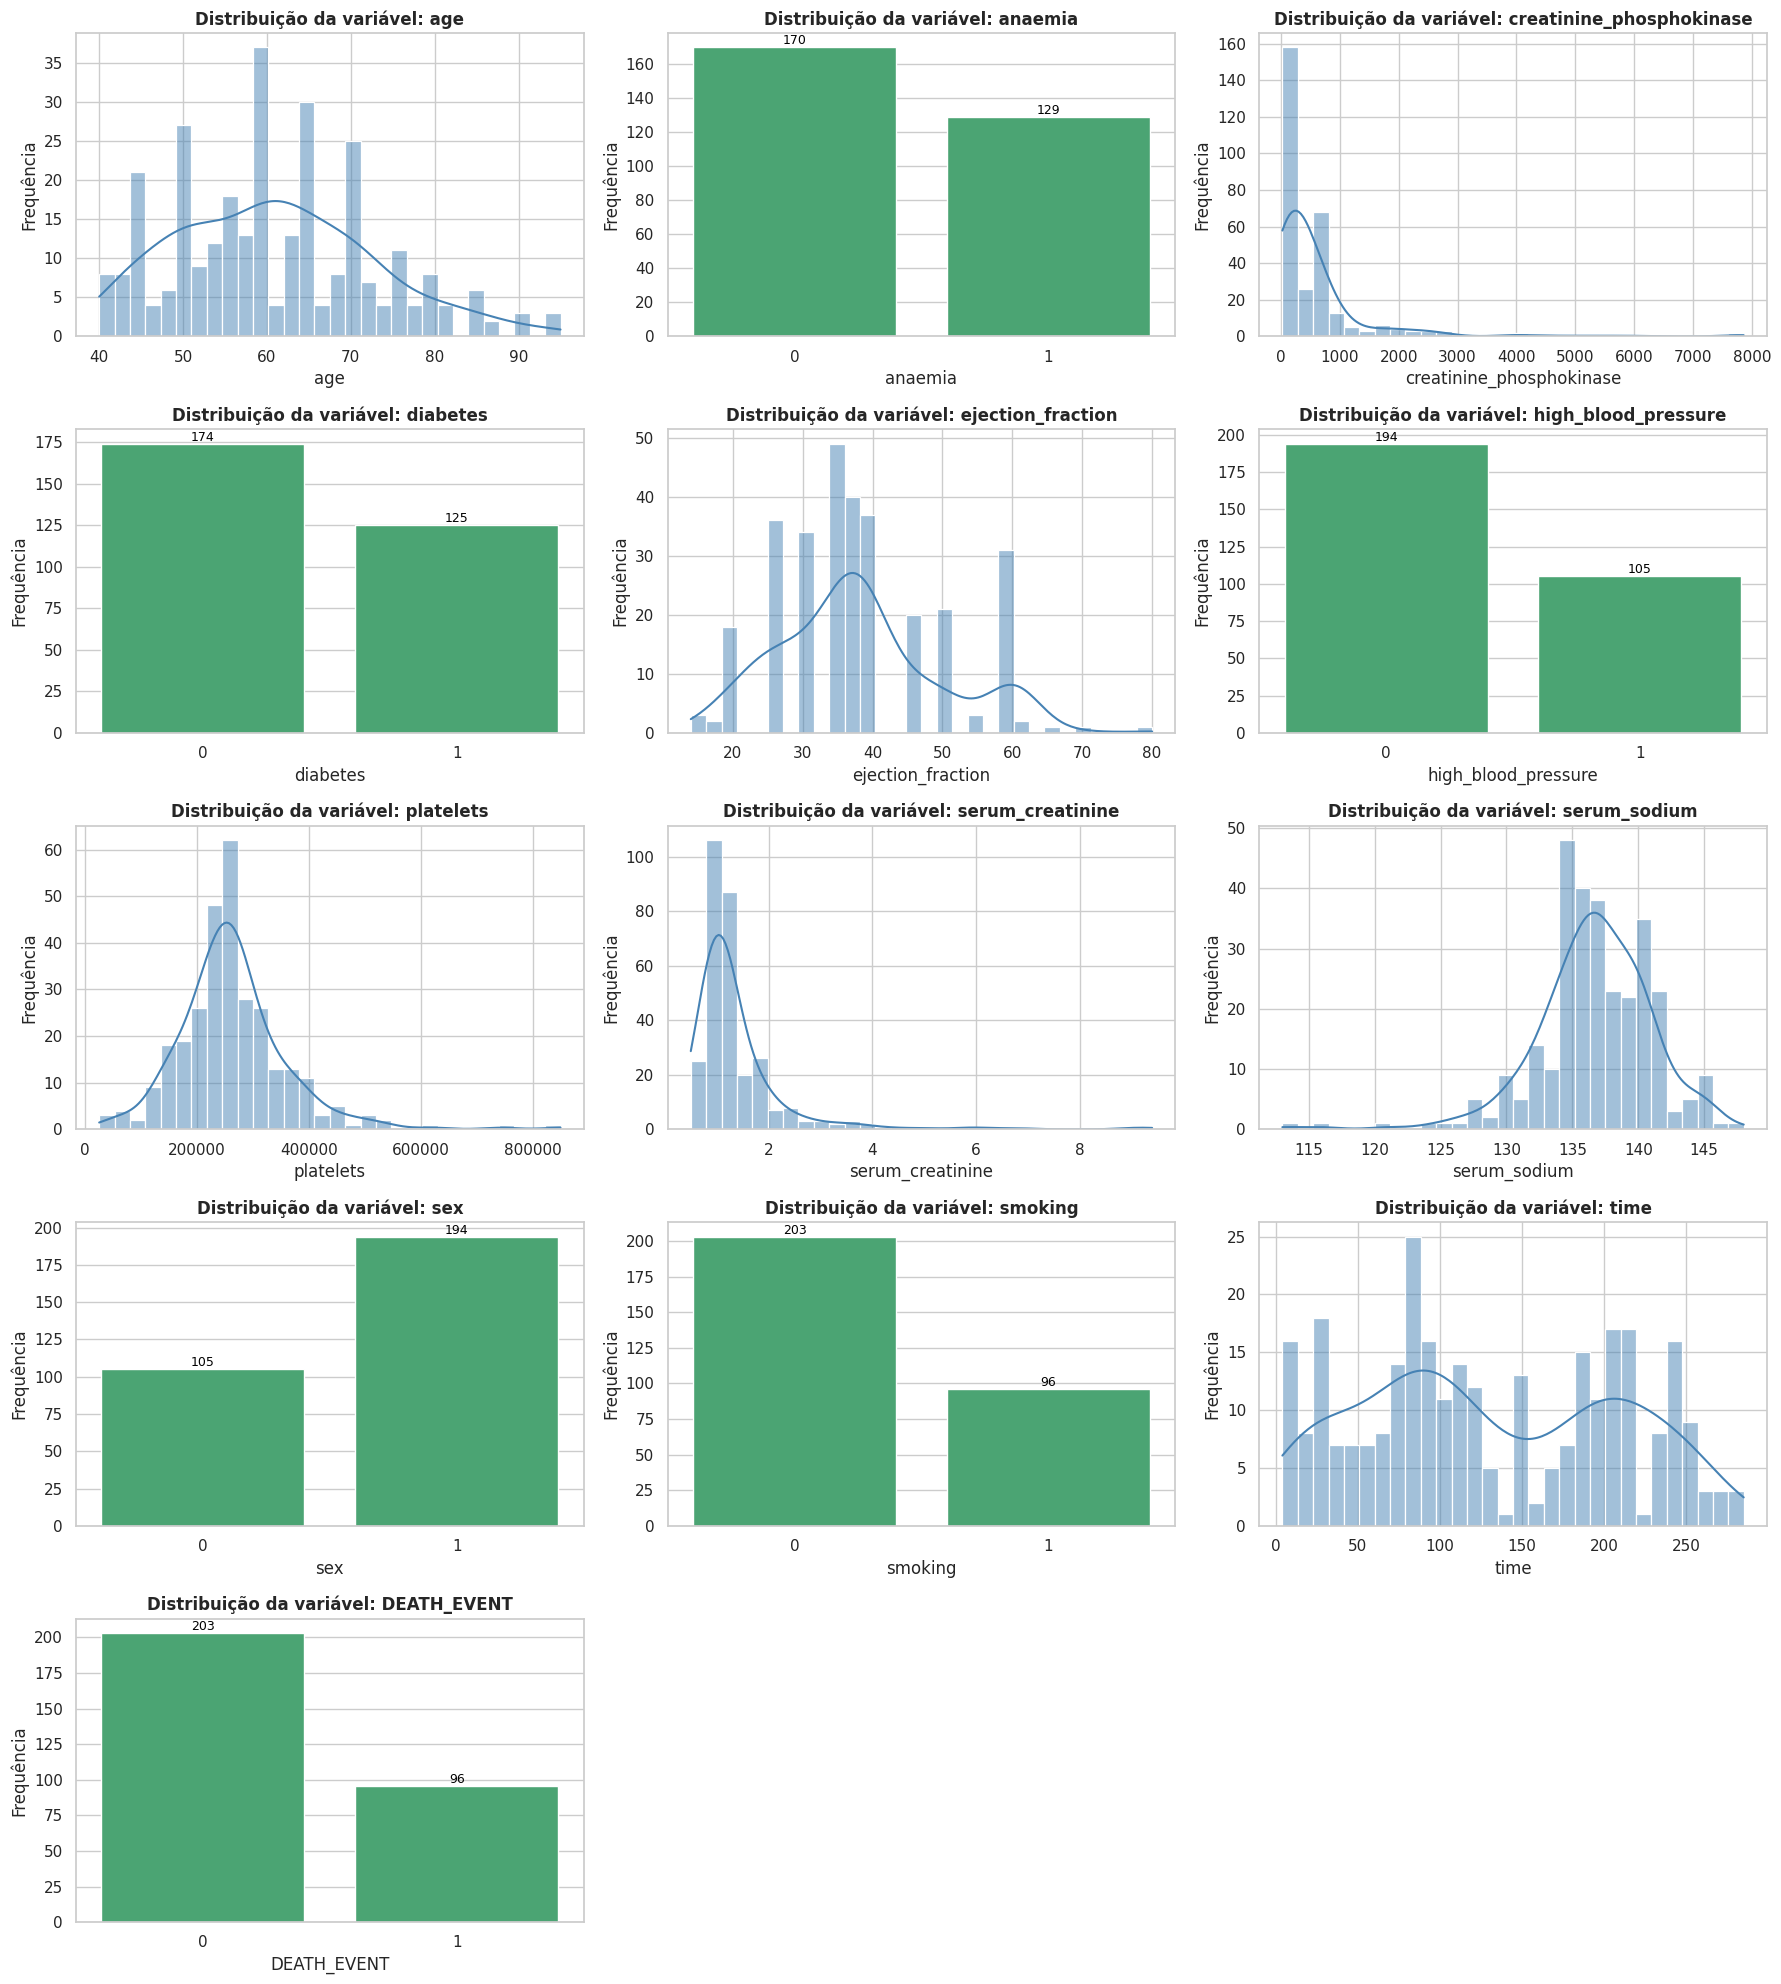

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste visual global
sns.set(style="whitegrid")

# Identifica colunas numéricas
atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

# Define layout: 3 gráficos por linha
n_colunas = 3
n_linhas = -(-len(atributos_numericos) // n_colunas)  # arredonda pra cima
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axs = axs.flatten()

# Gera os gráficos
for i, col in enumerate(atributos_numericos):
    ax = axs[i]

    # Verifica se é uma variável booleana (0/1 apenas)
    if df[col].dropna().isin([0, 1]).all() and df[col].nunique() == 2:
        sns.countplot(x=col, data=df, ax=ax, color='mediumseagreen')
        ax.set_ylabel("Frequência")

        # Adiciona os rótulos de frequência nas barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')
    else:
        sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue', ax=ax)
        ax.set_ylabel("Frequência")

    ax.set_title(f'Distribuição da variável: {col}', fontsize=12, fontweight='bold')

# Remove gráficos vazios (caso o número de atributos não seja múltiplo de 3)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


###  Resultados - Overview

Ao observar os gráficos, percebe-se que os atributos binários como sex, anaemia, diabetes, high_blood_pressure, smoking e DEATH_EVENT já estão em formato adequado, representando categorias com valores 0 e 1. Não exigem transformação adicional.

Por outro lado, variáveis como creatinine_phosphokinase, serum_creatinine e platelets apresentam distribuição assimétrica, com valores extremos (outliers), o que pode afetar modelos sensíveis à escala ou à normalidade. Nesses casos, transformações como logaritmo, normalização ou padronização podem ser úteis.

Já variáveis como age, ejection_fraction, serum_sodium e time têm distribuição mais simétrica, mas podem se beneficiar de padronização.

Portanto, a análise gráfica ajuda a definir estratégias específicas de transformação para cada tipo de variável na preparação dos dados.

### O problema de classificação

O modelo em questão se trata de um problema de Machine Learning supervisionado do tipo classificação binária, cujo objetivo é prever a ocorrência de morte entre pacientes com insuficiência cardíaca. A variável-alvo utilizada para isso é DEATH_EVENT, que assume valor 1 quando o paciente foi a óbito e 0 caso tenha sobrevivido.

Ao analisar a distribuição dessa variável, conforme o gráfico de barras acima exposto,  observa-se que 203 pacientes sobreviveram (classe 0) e 96 foram a óbito (classe 1), o que representa uma proporção aproximada de 68% para 32%. Esse cenário caracteriza um leve desbalanceamento entre as classes, uma vez que a quantidade de exemplos da classe majoritária (sobrevivência) é mais que o dobro da classe minoritária (óbito).

Apesar de não se tratar de um desbalanceamento extremo, é importante considerar que alguns algoritmos de classificação podem ser sensíveis a esse tipo de desequilíbrio, especialmente se a métrica de avaliação principal utilizada for a acurácia. Em situações como essa, um modelo que previsse sistematicamente a classe majoritária (por exemplo, “nenhuma morte”) poderia alcançar uma acurácia de 68%, mesmo sem identificar corretamente nenhum caso de óbito. Isso evidencia a necessidade de utilizar métricas mais apropriadas, como F1-score ou AUC-ROC, que conseguem capturar melhor o desempenho do modelo em relação à classe minoritária — que, neste contexto clínico, é justamente a mais relevante.

Além da escolha adequada das métricas, pode ser necessário aplicar técnicas de balanceamento de classes na etapa de modelagem. Entre as abordagens possíveis estão o oversampling da classe minoritária (como o uso do algoritmo SMOTE), o undersampling da classe majoritária, ou o uso de ponderação de classes nos próprios algoritmos.

Por fim, vale destacar que os autores do estudo original não reportaram problemas significativos causados pelo desbalanceamento observado. Isso provavelmente se deve ao uso de algoritmos robustos e à escolha de métricas adequadas. No entanto, é fundamental que esse ponto seja levado em consideração ao construir novos modelos ou ao aplicar esse dataset em outros contextos.

## 6.2 Relação entre variável numérica e variável de interesse - Boxplot

Nesta etapa, utilizamos boxplots para analisar a relação entre cada variável numérica e o desfecho de interesse (DEATH_EVENT). Essa escolha se justifica porque o boxplot permite:

Comparar distribuições entre dois grupos (pacientes que morreram e que sobreviveram),

Visualizar diferenças de mediana, dispersão e outliers, identificar variáveis com potencial preditivo relevante para o modelo.

Esse tipo de visualização é especialmente útil para destacar tendências distintas entre as classes, servindo como apoio no entendimento das variáveis do modelo.

O detalhamento será abordado a seguir:


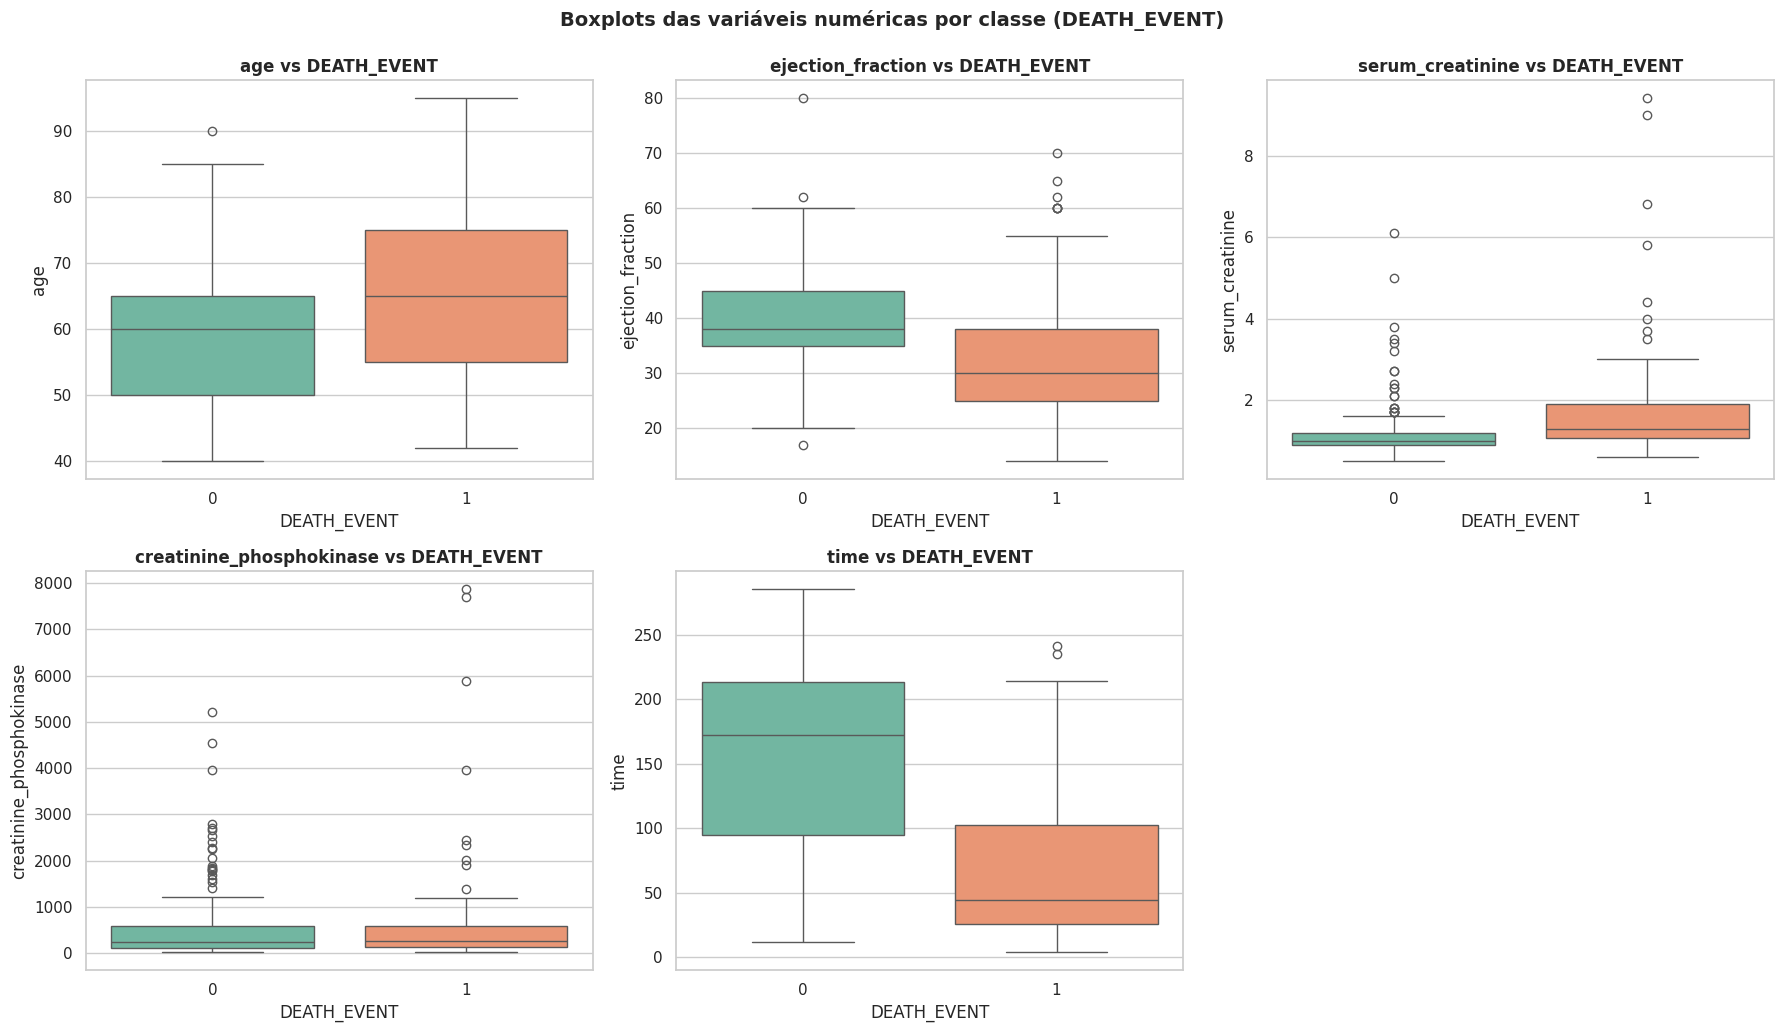

In [28]:
# Verifica se df já está carregado
if 'df' not in globals():
    import pandas as pd
    url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
    df = pd.read_csv(url, sep=';')
    df.loc[185, 'age'] = 65
    df.loc[188, 'age'] = 60

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Variáveis numéricas principais
variaveis_numericas = ['age', 'ejection_fraction', 'serum_creatinine',
                       'creatinine_phosphokinase', 'time']

# Criar grid de gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Gerar um boxplot para cada variável
for i, var in enumerate(variaveis_numericas):
    sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} vs DEATH_EVENT', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('DEATH_EVENT')
    axes[i].set_ylabel(var)

# Remove espaço vazio se sobrar
if len(variaveis_numericas) < len(axes):
    fig.delaxes(axes[-1])

# Título geral e ajustes
plt.tight_layout()
plt.suptitle('Boxplots das variáveis numéricas por classe (DEATH_EVENT)', fontsize=14, fontweight='bold', y=1.03)
plt.show()


### Resultados - Overview

A análise exploratória por meio de boxplots mostra que variáveis como idade, fração de ejeção, creatinina sérica e tempo de acompanhamento apresentam diferenças significativas entre os grupos de óbito e sobrevivência. Isso indica que essas variáveis podem ter papel preditivo relevante na construção do modelo de Machine Learning. Algumas variáveis, como creatinine_phosphokinase, apresentam muitos outliers e uma separação menos clara, podendo demandar transformações ou análise complementar.
### Detalhamento

**1. age vs DEATH_EVENT**

Idade média dos mortos (classe 1) é maior que a dos vivos (classe 0).

Isso reforça que a idade é um fator relevante para risco de morte por insuficiência cardíaca.

Os dois grupos têm outliers, mas o padrão geral é claro: quanto mais velho, maior o risco.

**2. ejection_fraction vs DEATH_EVENT**

O grupo que morreu tem uma fração de ejeção menor.

Isso bate com a literatura: fração de ejeção baixa = coração está bombeando mal.

Variável bem importante, parece discriminativa para o modelo.

**3. serum_creatinine vs DEATH_EVENT**

Os que morreram têm níveis ligeiramente mais altos de creatinina sérica.

É um marcador de função renal — e função renal ruim aumenta risco cardíaco.

Muitos outliers no grupo de mortos, o que indica possível instabilidade clínica.

**4. creatinine_phosphokinase vs DEATH_EVENT**

Essa variável tem muitos outliers, dos dois lados.

Não parece ter uma separação tão clara entre vivos e mortos.

Pode ter importância, mas é menos óbvia — precisaria de análise complementar ou normalização.

**5. time vs DEATH_EVENT**

O tempo que o paciente ficou em observação é claramente maior entre os que sobreviveram.

Os que morreram geralmente morreram mais cedo.

Forte potencial preditivo — mas cuidado: é uma variável que pode "olhar pro futuro", dependendo da lógica do modelo.

### Sobre a Variável [AGE]

Embora a variável age apresente uma clara diferença entre os grupos de óbito e sobrevivência, os autores do estudo original observaram que sua exclusão resultava em modelos com desempenho superior. Isso pode estar relacionado a colinearidade/redundância de informação, overfitting, ou ainda ao viés da amostra. Portanto, mesmo sendo preditiva, age pode ter reduzido a capacidade do modelo de generalizar, impactando negativamente métricas como F1-score. Dessa forma, mesmo atributos com forte correlação aparente podem ser removidos estrategicamente para melhorar a generalização do modelo.


## 6.3 Análise sobre atributos booleanos - Gráfico em Barras

Para os atributos booleanos, optamos por uma visualização baseada em gráficos de barras empilhadas com rótulos percentuais. Essa abordagem permite observar, para cada valor da variável (ex: presença ou ausência de anemia), a proporção de pacientes que sobreviveram ou morreram (DEATH_EVENT).

Essa visualização é especialmente útil em problemas de classificação binária, pois revela indícios de associação entre os atributos e o desfecho. A comparação das proporções entre as classes fornece sinais sobre o possível impacto de cada variável na mortalidade.

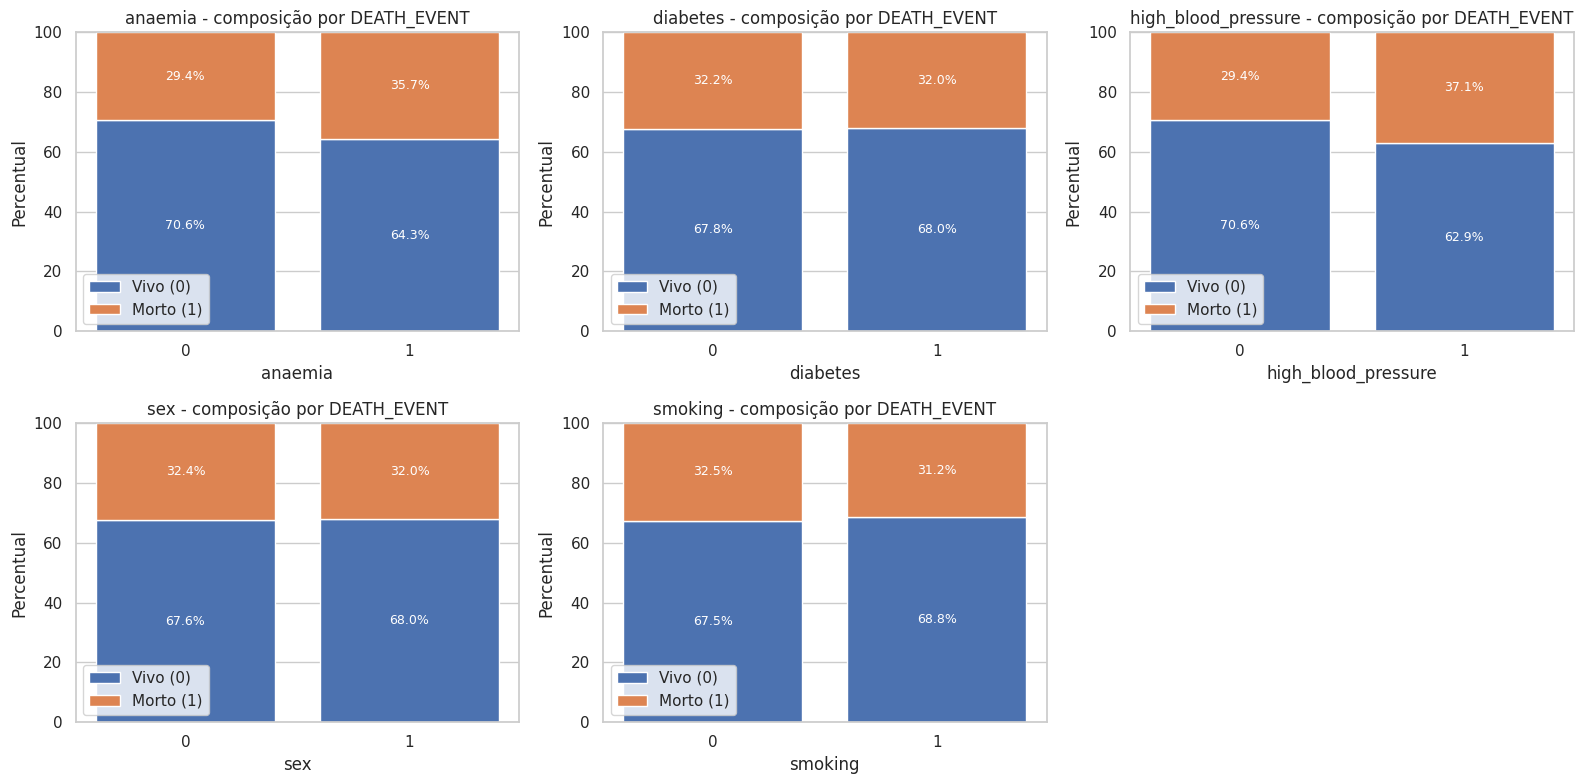

In [29]:
import matplotlib.pyplot as plt

# Lista de variáveis booleanas
variaveis_booleanas = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Cria gráfico de barras empilhadas com percentual para cada variável booleana
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variaveis_booleanas):
    # Calcula percentual de vivos e mortos para cada valor da variável (0 ou 1)
    percentual = df.groupby([var, 'DEATH_EVENT']).size().unstack().fillna(0)
    percentual = percentual.div(percentual.sum(axis=1), axis=0) * 100

    # Plota gráfico de barra empilhada
    ax = axes[i]
    bottom = [0] * len(percentual)
    for death_event in [0, 1]:
        label = 'Vivo (0)' if death_event == 0 else 'Morto (1)'
        heights = percentual[death_event]
        ax.bar(percentual.index.astype(str), heights, bottom=bottom, label=label)

        # Rótulos com os valores em cima das barras
        for j, val in enumerate(heights):
            ax.text(j, bottom[j] + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
            bottom[j] += val

    ax.set_title(f'{var} - composição por DEATH_EVENT')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentual')
    ax.set_ylim(0, 100)
    ax.legend()

# Remove gráfico vazio se número de gráficos for ímpar
if len(variaveis_booleanas) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Resultados - Overview

Interpretação de cada variável:

**1. anaemia**

Mortes: 35,7% com anemia vs 29,4% sem.

Possível risco levemente aumentado com anemia.

**2. diabetes**

Praticamente nenhuma diferença entre os grupos (32,2% vs 32,0%).

Não parece relevante isoladamente.

**3. high_blood_pressure**

Mortes: 37,1% com pressão alta vs 29,4% sem.

Pode ter influência significativa no desfecho.

**4. sex**

Homens (1) e mulheres (0) têm taxas bem próximas (32% vs 32,4%).

Pouca diferença, mas precisa de testes estatísticos para cravar.

**5. smoking**

Mortes: 31,2% fumantes vs 32,5% não fumantes.

Contraintuitivo — fumantes morreram proporcionalmente menos.

Pode estar correlacionado com outra variável (ex: idade menor entre fumantes).

A análise dos gráficos revela que, em alguns atributos booleanos, há variações discretas nas proporções de óbitos entre os grupos:

Pacientes com pressão alta (high_blood_pressure = 1) tiveram maior proporção de morte (37,1%) do que os sem pressão alta (29,4%).

Entre os pacientes com anemia, a taxa de óbito também foi ligeiramente superior (35,7% contra 29,4%).

Para diabetes, sexo e tabagismo, as diferenças entre as classes foram pequenas, sugerindo baixa capacidade discriminativa isolada.

Esses padrões sugerem que algumas variáveis podem ter papel preditivo modesto, enquanto outras, como high_blood_pressure, merecem atenção. Ainda assim, é importante ressaltar que relações isoladas não garantem causalidade — a análise combinada (com modelos) será mais conclusiva.



## 6.4 Análise de correlação entre variáveis - Heatmap

Após a análise individual de cada atributo, realizamos agora uma análise combinada por meio de um heatmap de correlação de Pearson.

O objetivo é identificar possíveis relações lineares entre as variáveis — especialmente entre os atributos preditores e a variável-alvo DEATH_EVENT.

Essa etapa é fundamental por dois motivos:

Permite observar possíveis redundâncias entre variáveis (alta correlação entre preditores).

Indica quais variáveis têm maior correlação com a variável-alvo, o que pode ajudar na seleção de atributos relevantes para o modelo.

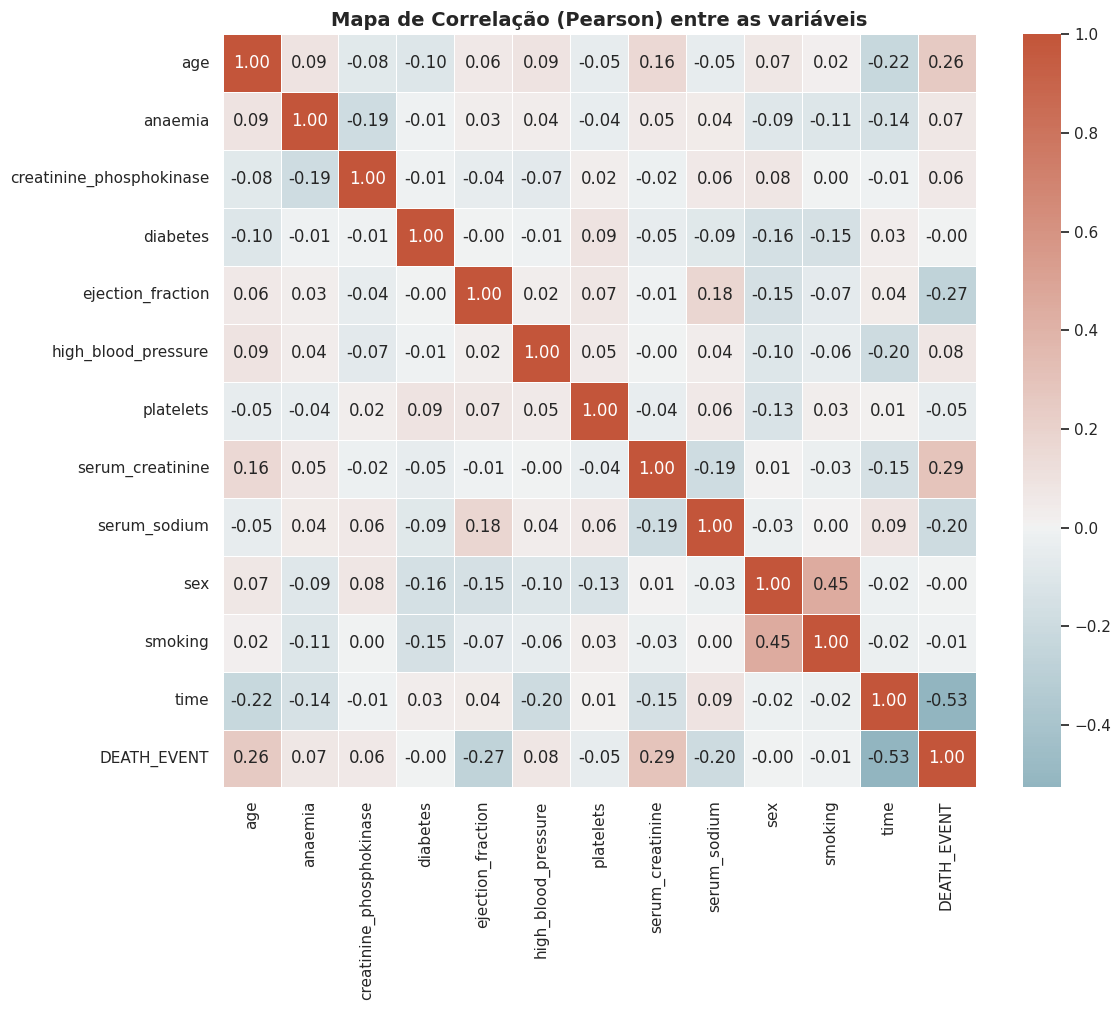

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação de Pearson
corr = df.corr(method='pearson')

# Define uma paleta de cores personalizada
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Plota o heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, square=True)

plt.title('Mapa de Correlação (Pearson) entre as variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Resultados - Overview

Este gráfico é um heatmap de correlação de Pearson, uma ferramenta visual que mede a força e a direção de uma relação linear entre duas variáveis.Nossa análise principal foca-se na última linha/coluna, que mostra como cada variável se correlaciona com o evento de interesse: DEATH_EVENT.

#### **Análise das Correlações com DEATH_EVENT (O Alvo)**

Esta é a parte mais importante da análise, pois nos diz quais fatores estão mais associados à ocorrência de um evento de morte.

**time (-0.53)**: Esta é a correlação mais relevante no gráfico com DEATH_EVENT. É uma correlação negativa moderada a forte.

Conforme a variável time (tempo de acompanhamento) diminui, a probabilidade de um DEATH_EVENT aumenta. Isso confirma o que vimos nos boxplots: pacientes que morrem têm, por definição, um tempo de acompanhamento menor.

**serum_creatinine (0.29)**: Correlação positiva fraca.

Pacientes com níveis mais altos de creatinina tendem levemente a ter maior mortalidade. Isso reforça a ideia de que a piora da função renal é um fator de risco, contudo, a relação é fraca e exige cautela. Indica ser relevante no modelo quando combinada com outras variáveis.

**ejection_fraction (-0.27)**: Correlação negativa fraca.

Uma fração de ejeção mais baixa (pior função de bombeamento do coração) está associada a uma maior chance de DEATH_EVENT, ainda que fraca isoladamente, se mostra coerente com a literatura clínica.

**age (0.26)**: Correlação positiva fraca.

Idade mais avançada está associada a uma maior probabilidade de DEATH_EVENT, ainda que a relação seja sutil. Mesmo sendo fortemente intuititiva e geralmente preditiva, no artigo original foi removida por overfitting. (AJUSTAR)

**serum_sodium (-0.20)**: Correlação negativa fraca.

Níveis mais baixos de sódio no sangue estão levemente associados a um aumento na chance de DEATH_EVENT.

**Outras Variáveis**: high_blood_pressure (0.08), anaemia (0.07), creatinine_phosphokinase (0.06), etc., têm correlações muito fracas (próximas de zero) com DEATH_EVENT. Isso sugere que, isoladamente e de forma linear, elas não são fortes preditores do evento de morte.


### Correlações Notáveis Entre as Outras Variáveis
Analisar as correlações entre as variáveis preditoras também é importante, principalmente para evitar problemas de multicolinearidade em alguns modelos de machine learning.

**smoking e sex (0.45)**: Existe uma correlação positiva moderada entre sexo e tabagismo.

Interpretação: Isso provavelmente significa que um dos sexos (tipicamente codificado como 1, que costuma ser masculino em muitos datasets) tem uma proporção maior de fumantes nesta amostra.

Em consistência com os resultados anteriores, este heatmap apresenta resultados que corroboram com a análise dos boxplots. As variáveis que mostraram as maiores diferenças visuais entre os grupos (age, ejection_fraction, serum_creatinine, time) são as mesmas que apresentam os maiores coeficientes de correlação com DEATH_EVENT.

Ainda que a maioria das variáveis possuam correlação desprezível com a variável-alvo, os modelos de ML podem aprender padrões complexos combinando essas variáveis, extraindo informações mesmo de correlações fracas.

Principais Preditores: time, serum_creatinine, ejection_fraction, e age são os indicadores lineares mais fortes de DEATH_EVENT neste dataset.

Limitação: A correlação de Pearson mede apenas relações lineares. É possível que existam relações não-lineares importantes que não são capturadas aqui (por exemplo, um nível "ótimo" de uma variável, onde tanto valores muito altos quanto muito baixos são ruins).

Próximo Passo: As variáveis identificadas como mais correlacionadas são candidatas ideais para serem incluídas como "features" (características) em um modelo de machine learning (como Regressão Logística, Random Forest, etc.) para prever a probabilidade de DEATH_EVENT para um paciente.




# 7. Pré-processamento e padronização

Nesta etapa, realizamos operações essenciais de tratamento e preparação dos dados para garantir que o conjunto esteja em condições ideais para ser utilizado em modelos de aprendizado de máquina.

Embora essa base já tenha sido disponibilizada limpa pelos autores, há alguns ajustes e transformações que podem ser aplicados para potencializar a performance dos algoritmos e a qualidade da análise.

As operações escolhidas nesta etapa seguiram tanto as boas práticas da literatura quanto os achados da análise exploratória.

## 7.1 Etapa de Padronização

Selecionamos esta transformação pois as variáveis apresentam escalas muito diferentes, o que pode comprometer o desempenho de determinados algorítimos. Isso ocorre pois se uma variável tem valores entre 0 e 1, e outra entre 0 a 10.000, a que tem maior escala pode dominar a aprendizagem, mesmo sendo menos relevante.

Dessa forma, para garantir equidade entre os atributos e evitar viés por escala, aplicamos a padronização apenas sobre as variáveis numéricas contínuas, mantendo as binárias (0 ou 1) como estão.

As variáveis padronizadas, serão:

1. age – idade do paciente

2. creatinine_phosphokinase – enzima CPK no sangue

3. ejection_fraction – porcentagem de sangue ejetado pelo coração

4. platelets – contagem de plaquetas

5. serum_creatinine – nível de creatinina sérica

6. serum_sodium – nível de sódio no sangue

7. time – tempo de acompanhamento do paciente (em dias)

Conforme dito anteriormente, essas variáveis são numericamente contínuas e com escalas distintas, por isso foram escolhidas para passar pelo StandardScaler.

Variáveis binárias como sex, diabetes, smoking, anaemia, high_blood_pressure e DEATH_EVENT não foram transformadas, pois já estão normalizadas naturalmente em 0 ou 1, e alterar sua escala quebraria o significado lógico dessas categorias.





In [31]:
from sklearn.preprocessing import StandardScaler

# Seleciona apenas variáveis numéricas contínuas (exclui variáveis binárias)
variaveis_continuas = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                       'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Inicializa o scaler
scaler = StandardScaler()

# Aplica a padronização
df_scaled = df.copy()
df_scaled[variaveis_continuas] = scaler.fit_transform(df[variaveis_continuas])

# Exibe as primeiras linhas da base padronizada
df_scaled.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.19,0,0.00,0,-1.53,1,0.02,0.49,-1.50,1,0,-1.63,1
1,-0.49,0,7.51,0,-0.01,0,0.00,-0.28,-0.14,1,0,-1.60,1
2,0.35,0,-0.45,0,-1.53,0,-1.04,-0.09,-1.73,1,1,-1.59,1
3,-0.91,1,-0.49,0,-1.53,0,-0.55,0.49,0.09,1,0,-1.59,1
4,0.35,1,-0.44,1,-1.53,0,0.65,1.26,-4.68,0,0,-1.58,1


A partir da visualização das primeiras linhas do dataset padronizado, é possível confirmar que a transformação foi bem-sucedida. As variáveis contínuas — como age, ejection_fraction, serum_creatinine, time, entre outras — passaram a apresentar valores centralizados próximos de 0, com variações positivas e negativas dentro de uma faixa padronizada.

Esse comportamento indica que a padronização via z-score foi corretamente aplicada, tornando os dados comparáveis entre si e prontos para serem utilizados em modelos sensíveis à escala.

Importante notar que as variáveis binárias (anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT) foram preservadas em seu formato original (0 ou 1), evitando distorções de interpretação.

Em modelos sensíveis à escala, como regressão logística, KNN, SVM ou redes neurais, a falta de padronização pode levar o algoritmo a priorizar indevidamente variáveis com valores absolutos mais altos, mesmo que sejam menos relevantes do ponto de vista preditivo. Ao aplicar o z-score, damos a todas as variáveis contínuas igual peso estatístico, permitindo que o modelo aprenda com base na variação relativa dos dados, e não em seus valores brutos.

A partir de agora, este dataset padronizado servirá como base para a etapa de modelagem, aumentando a estabilidade dos pesos durante o treinamento e oferecendo um ambiente estatisticamente equilibrado e mais adequado para o treinamento dos algoritmos de machine learning.

### Outras operações de transformação

Após a análise das características do dataset, concluímos que a única operação de pré-processamento realmente necessária era a padronização das variáveis contínuas, por meio da técnica de z-score. Essa transformação foi aplicada com sucesso e trouxe as variáveis para uma escala comum (média 0, desvio-padrão 1), garantindo que nenhuma dominasse a aprendizagem do modelo por conta da magnitude dos seus valores.

Outras operações, como one-hot encoding ou discretização, não se mostraram necessárias neste caso: todas as variáveis categóricas já estão devidamente binarizadas (0 ou 1), e as variáveis contínuas são mais bem exploradas mantendo sua granularidade original. Também não foi realizada remoção de outliers, pois os modelos preditivos escolhidos (como regressão logística) são relativamente robustos a esse tipo de variação, e os valores extremos encontrados refletem variações fisiológicas reais, como no caso da enzima CPK.

### Tratamento de valores faltantes

Durante a etapa de pré-processamento, verificamos que não há valores faltantes formais (NaN) no dataset. No entanto, durante a análise exploratória inicial, identificamos dois registros com valores inválidos na coluna age, onde constavam idades acima de 60 mil anos — claramente fruto de erro de entrada. Esse problema foi tratado diretamente naquela etapa, com uma estratégia bem fundamentada: segmentamos registros semelhantes com base em atributos clínicos e imputamos a mediana de idade de cada grupo correspondente.

Como esse tratamento já foi realizado com todo o cuidado, optamos por não repetir a intervenção nesta fase, mantendo o foco na padronização das variáveis contínuas e preservação das variáveis binárias. Com isso, concluímos que o dataset encontra-se livre de inconsistências e pronto para uso em modelagem preditiva.

# 8. Visualizações pós-processamento

Justificativa das variáveis escolhidas (serum_creatinine e ejection_fraction)

Essas duas variáveis foram escolhidas para reavaliação por dois motivos principais:

Distribuição assimétrica:

Ambas apresentam distribuições não normais, com cauda longa (valores extremos).

Isso foi observado nos histogramas anteriores, que mostraram concentrações em um lado da curva.

Relevância clínica e preditiva:

Segundo o artigo-base, essas duas variáveis são as mais fortemente associadas à mortalidade, sendo as únicas mantidas nos modelos com melhor desempenho.

Ou seja, além de estatisticamente sensíveis, são clinicamente centrais para o problema.

Portanto, faz sentido técnico e clínico reavaliar seu comportamento após a padronização, validando se o pré-processamento afetou a percepção dos dados.



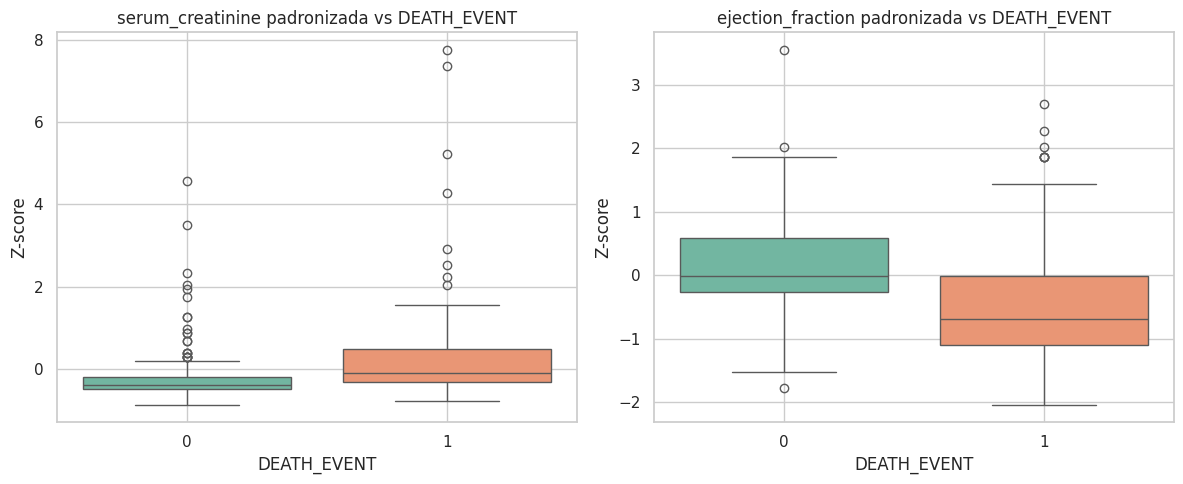

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define as variáveis mais relevantes após padronização
variaveis_alvo = ['serum_creatinine', 'ejection_fraction']

# Cria os boxplots lado a lado, segmentados por DEATH_EVENT
plt.figure(figsize=(12, 5))

for i, var in enumerate(variaveis_alvo, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df_scaled, x='DEATH_EVENT', y=var, palette='Set2')
    plt.title(f'{var} padronizada vs DEATH_EVENT', fontsize=12)
    plt.xlabel('DEATH_EVENT')
    plt.ylabel('Z-score')
    plt.grid(True)

plt.tight_layout()
plt.show()



A comparação entre os boxplots originais e os boxplots padronizados demonstrou que a forma geral das distribuições se manteve, como esperado. No entanto, ao adotar a escala padronizada (Z-score), o eixo y passou a representar unidades de desvio padrão, o que traz vantagens importantes: facilita a comparação entre variáveis com escalas diferentes, destaca outliers de maneira mais uniforme e prepara os dados adequadamente para algoritmos que pressupõem variáveis centradas e escaladas, como regressão logística, SVM e PCA.

Além disso, a visualização padronizada permitiu observar com mais clareza que pacientes que vieram a óbito (DEATH_EVENT = 1) apresentaram, em média, valores mais altos de creatinina e mais baixos de fração de ejeção, ambos distantes da média da população — o que reforça o papel preditivo dessas variáveis já identificado anteriormente. A padronização, portanto, manteve os padrões relevantes e ao mesmo tempo tornou o conjunto mais adequado para a etapa posterior de modelagem.



# 9. Conclusão

Este estudo exploratório teve como objetivo entender os principais padrões e relações presentes no conjunto de dados sobre insuficiência cardíaca crônica. Por meio de uma análise cuidadosa e progressiva, foi possível identificar variáveis com maior poder preditivo, investigar correlações relevantes e aplicar técnicas de pré-processamento fundamentais como a padronização. A investigação visual e estatística reforçou achados importantes da literatura, como o papel da fração de ejeção e da creatinina sérica na mortalidade dos pacientes, e preparou o terreno para futuras etapas de modelagem preditiva. Conclui-se, portanto, que uma análise exploratória estruturada, combinada a boas práticas de preparação dos dados, é essencial para garantir a qualidade e a efetividade de modelos de machine learning aplicados à saúde.

# 10. Seção Extra – Predição com Interface Interativa (O modelo de Machine Learning)

Para fins exploratórios, foi implementado no Google Colab um modelo de regressão logística treinado com os dados padronizados (Z-score), utilizando todas as variáveis disponíveis do dataset. Embora o objetivo do trabalho da PUC se limite até o pré-processamento, esta seção adicional serve como demonstração prática de aplicabilidade dos dados tratados.

A interface interativa foi construída com ipywidgets, permitindo que o usuário insira valores manuais para cada variável (já transformados em escala Z), e veja o resultado da previsão do modelo — "MORTE (1)" ou "NÃO MORTE (0)" — em tempo real. Isso simula como um sistema automatizado poderia, com base em dados clínicos, indicar a probabilidade de óbito de um paciente com insuficiência cardíaca.

O modelo utilizado, regressão logística, foi escolhido por ser o mesmo empregado pelos autores do estudo original em parte das análises. Embora o artigo tenha identificado melhor performance com modelos mais complexos (como Random Forest e XGBoost), a regressão logística ainda apresentou desempenho satisfatório, especialmente com apenas duas variáveis preditoras (serum_creatinine e ejection_fraction).

In [35]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 2. Definir X (variáveis preditoras) e y (variável alvo)
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']

# 3. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 5. Avaliar (só para curiosidade)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

# 6. Previsão manual: inserir os valores manualmente abaixo (valores padronizados)
# Ordem dos campos:
# ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
#  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
#  'sex', 'smoking', 'time']

# Exemplo: homem, 65 anos, fração de ejeção baixa, creatinina alta

# Criar DataFrame com os mesmos nomes de colunas usados no treino
colunas = X_train.columns
valores = [[0.7, 1, 0.2, 0, -1.4, 1, -0.2, 1.8, 0.0, 1, 1, -1.2]]
nova_amostra_df = pd.DataFrame(valores, columns=colunas)

# 7. Rodar previsão
predicao = modelo.predict(nova_amostra_df)
print("Resultado da previsão:", "MORTE (1)" if predicao[0]==1 else "NÃO MORTE (0)")


              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

Resultado da previsão: MORTE (1)


Resultados do modelo e desempenho preditivo
Após o treinamento com o modelo de regressão logística, observamos métricas bastante positivas. O modelo alcançou uma acurácia de 82%, indicando que, no conjunto de teste, ele foi capaz de acertar a previsão de óbito ou sobrevivência em 8 a cada 10 pacientes.

Destacam-se ainda os seguintes pontos:

A classe 0 (não morte) apresentou alta sensibilidade (recall de 0.97), ou seja, o modelo quase sempre identificou corretamente os pacientes que não morreram.

Já a classe 1 (morte) teve um precision elevado (0.94), ou seja, quando o modelo indicou óbito, na maioria das vezes estava certo. No entanto, seu recall foi mais baixo (0.60), revelando que o modelo ainda deixou de identificar alguns casos reais de óbito.

O F1-score de 0.80 para a média macro mostra um bom equilíbrio entre precisão e sensibilidade nas duas classes.

Esses resultados reforçam que, mesmo com um modelo simples e com um número limitado de variáveis, já é possível alcançar bom desempenho preditivo, evidenciando a robustez dos atributos utilizados e a importância da etapa de pré-processamento (como a padronização).

Para ilustrar a aplicabilidade prática do modelo, foi incluída uma simulação de uso real, em que o usuário pode testar diferentes combinações de variáveis clínicas já padronizadas (Z-score). Embora a versão com interface interativa usando sliders não tenha sido mantida nesta versão por questões de compatibilidade com o GitHub, a lógica do modelo foi preservada. O bloco final permite simular a previsão de risco de óbito com base em valores inseridos manualmente, demonstrando como o algoritmo pode ser integrado em soluções práticas no contexto da saúde. Essa etapa, apesar de não ser obrigatória pela PUC, reforça o caráter aplicado do projeto e sua utilidade além do ambiente acadêmico.



In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Usa base padronizada
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# --- Simulação de input manual (substitui os widgets)
# Preencha com valores Z-score reais ou simulados para testar
colunas = X_train.columns
valores = [[0.5, 1, -0.2, 0, -1.1, 1, 0.3, 0.7, -0.4, 1, 0, 0.1]]
entrada_simulada = pd.DataFrame(valores, columns=colunas)
resultado = modelo.predict(entrada_simulada)[0]

print("🩺 Resultado da previsão:", "🔴 MORTE (1)" if resultado == 1 else "🟢 NÃO MORTE (0)")


🩺 Resultado da previsão: 🟢 NÃO MORTE (0)


# 11. Referências
Já está presente no final do notebook
Inclui:

Kaggle / UCI

Paper (Chicco & Jurman, 2020)
